**Deltagere:**
- Andreas Høgh (201908525)
- Orhan Djafari Gazrani (201606693)
- Muheebrahman Rahmani (201903896)

**gruppe** 25 

**Dato:** [17-09-2023]





# Intro

I denne opgave arbejdes der med data som fortæller om der er en sammenligning mellem økonomi (GDP) og livstilfredshed for forskellige lande.

Så datasættet indeholder information om økonomiske faktorer (GDP) og sociale faktorer (livstilfredshed), og målet er at se, om der er en sammenhæng mellem de to, og i hvilket omfang økonomiske faktorer kan forudsige livstilfredshedsscoren for et givet land.

## Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # SWMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


The code in the book expects the data files to be located in the current directory. I just tweaked it here to fetch the files in datasets/lifesat.

In [3]:
import os
datapath = os.path.join("../datasets", "lifesat", "")

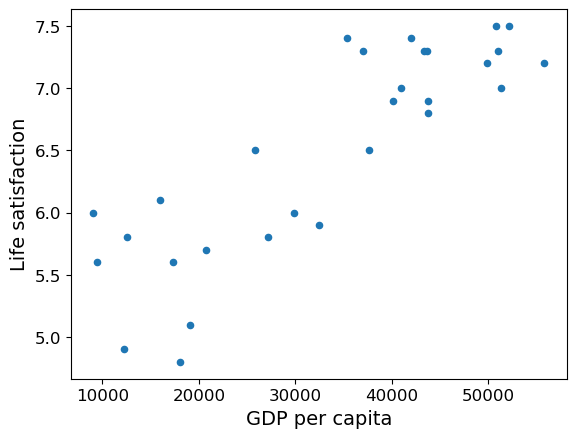

[[5.96242338]]
OK


In [4]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"SWMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

print("OK")

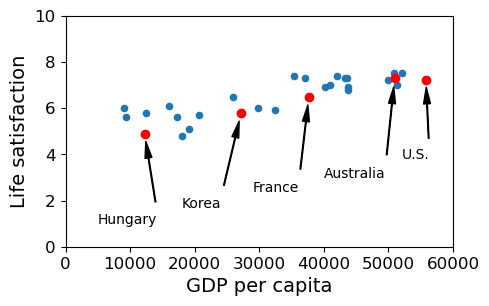

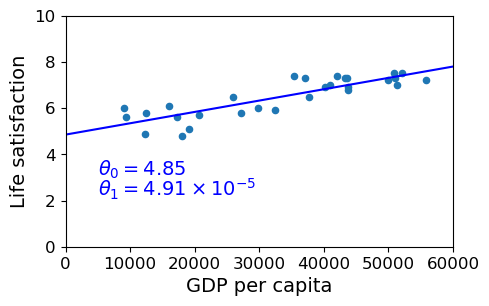

OK


In [5]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

print("OK")

## Qa) The $\theta$ parameters and the $R^2$ Score

I denne opgave undersøges brug af lineær regression og scikit-learn til at trække vigtige oplysninger fra en lineær regressionsmodel og beregne $R^2$-scoren.

Koefficienterne $\theta_0$ og $\theta_1$ kan udtrækkes fra en lineær regressionsmodel i scikit-learn ved hjælp af hhv. intercept_ og coef_ funktionerne

$R^2$-scoren beregnes for en lineær regressionsmodel ved at bruge model.score(X, y) i scikit-learn. "Den måler, hvor godt modellen passer til data ved at kvantificere, hvor meget af variansen i den afhængige variabel (y) forklaret af de uafhængige variabler (X)." citat chatGPT.

Minimale værdi for $R^2$-scoren er $-\infty$, mens den maksimale værdi er 1. En score på 1 indikerer en perfekt tilpasning, mens en negativ score indikerer, at modellen er værre end en simpel konstant model.

Det er bedst at have en høj $R^2$-score, da den måler fitness/goodness. $R^2$-scoren måler, hvor godt modellen passer til de observerede data.

Nedenstående kode viser at modellen har en $R^2$-score på 0.734 på de data som er defineret.

In [6]:
# Extract the coefficients
theta_0 = model.intercept_ 
theta_1 = model.coef_[0]   

# Print the coefficients
print("Intercept (𝜃0):", theta_0)
print("Slope (𝜃1):", theta_1)

# R2 score
model.score(X,y)

Intercept (𝜃0): [4.8530528]
Slope (𝜃1): [4.91154459e-05]


0.734441435543703

### Qb) Using k-Nearest Neighbors

I denne opgave bruges modellen `sklearn.neighbors.KNeighborsRegressor`.

Knn estimerer værdier ved at se på de nærmeste "naboer" datasættet. Præcisionen kan justeres ved at vælge, hvor mange "naboer" den skal tage hensyn til (k-værdien).

kNN regressor bruger R2 som score, mens lineær regression også bruger R2. De scoren for det 2 modeller er derfor sammenlignelige

R2 er en score, der hjælper os med at se, hvor godt vores model passer til vores data. Den fortæller os, hvor meget vores forudsigelser ligner de faktiske resultater. Høj R2 betyder, at vores model passer rigtig godt, mens lav R2 betyder, at den ikke gør det så godt. Denne metode er velegnet til regression.

I nedenstående kodeblok er der trænet en model med 3 naboer hvorefter der bliver forudsagt en værdi for Cypern's GDP per capita vha. modellen. Til sidst beregner det også en score for modellen på samme måde som lineær regression.

X.shape= (29, 1)
y.shape= (29, 1)


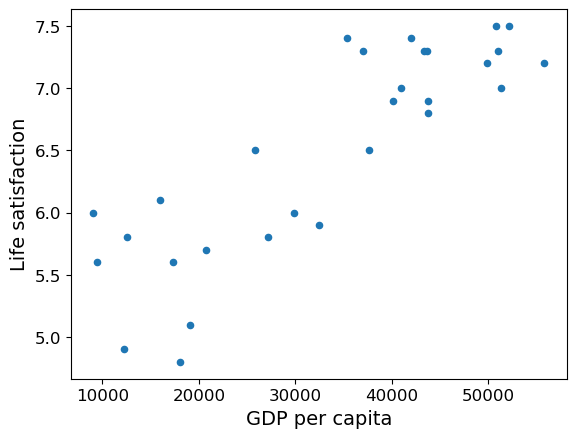

[[5.76666667]]


0.8525732853499179

In [7]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select and train a model
from sklearn.neighbors import KNeighborsRegressor

k = 3  # Antal naboer
knn = KNeighborsRegressor(n_neighbors=k)  # Opret en k-NN-regressionsmodel med k naboer
knn.fit(X, y)  # Træn modellen
y_pred = knn.predict([[22587]])
print(y_pred) 
knn.score(X,y)

### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

I denne opgave er det undersøgt, hvordan ændringen i k_neighbor-parameteren påvirker KNeighborsRegressor-modellen. 

Der blev oprettet tre plots for at sammenligne modellernes præstationer for forskellige k-værdier:

K-NN med k = 3.
K-NN med k = 20.
K-NN med k = 1.

Resultaterne viste, at KNeighborsRegressor-modellen med k = 1 var i stand til at tilpasse sig træningsdataene med en score på 1. Dette indikerer dog en potentiel overfitting, hvilket betyder at modellen får svært ved at generalisere, når den modtager ny data. Ved en k-værdi på 20 er der højst sandsynligt en underfitting da modellen ikke er særligt præcis. Ved at justere k-værdien kan vi styre modellens kompleksitet og evnen til at generalisere til nye data.

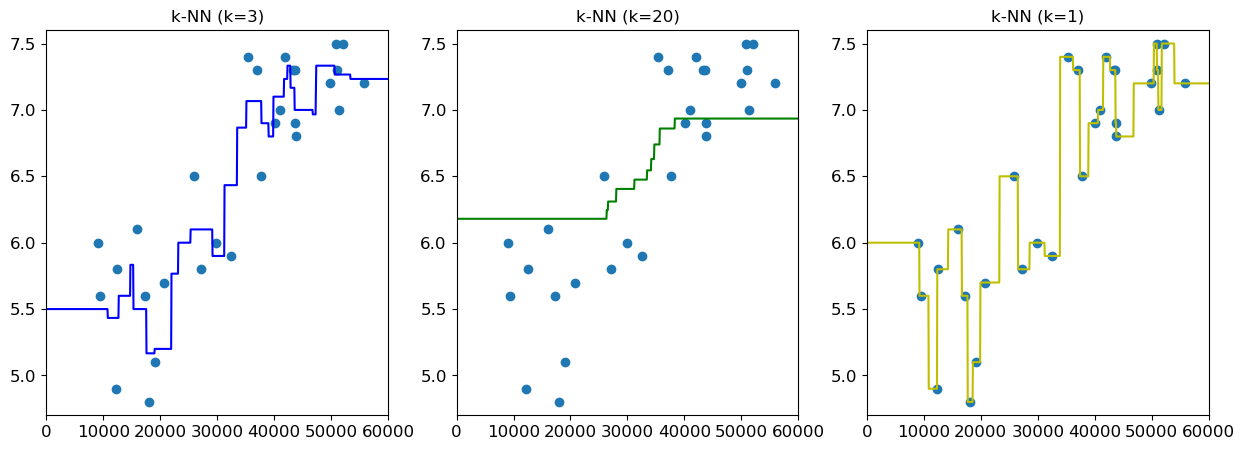

In [8]:
# create a test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m = np.linspace(0, 60000, 1000)
M = np.empty([m.shape[0], 1])
M[:, 0] = m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = knn.predict(M)   # ASSUMING the variable name 'knn' of your KNeighborsRegressor 

knn20 = KNeighborsRegressor(n_neighbors=20)  # Create a k-NN regression model with 20 neighbors
knn20.fit(X, y)  # Train the model
y_pred_knn20 = knn20.predict(M)

knn1 = KNeighborsRegressor(n_neighbors=1)  # Create a k-NN regression model with 1 neighbor
knn1.fit(X, y)  # Train the model
y_pred_knn1 = knn1.predict(M)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for k=3
axes[0].scatter(X, y)
axes[0].plot(m, y_pred_knn, "b")
axes[0].set_title("k-NN (k=3)")

# Plot for k=20
axes[1].scatter(X, y)
axes[1].plot(m, y_pred_knn20, "g")
axes[1].set_title("k-NN (k=20)")

# Plot for k=1
axes[2].scatter(X, y)
axes[2].plot(m, y_pred_knn1, "y")
axes[2].set_title("k-NN (k=1)")

for ax in axes:
    ax.axis([0, 60000, 4.7, 7.6])

plt.show()


### Qd) Trying out a Neural Network

I denne opgave er brugen af en neuralt netværk udforsket ved hjælp af Scikit-learns MLPRegressor på vores data.

Det er vigtigt at bemærke, at vores data ikke er skalerede, hvilket oftest giver et ubrugeligt output for MLPRegressor.

Vi trænede mlp-modellen med vores data og forudsagde værdien for Cypern ved hjælp af denne model. Vi beregnede også score-værdien for træningssættet, på samme måde som vi gjorde for de lineære og KNN-modeller.

MLPRegressor's score-funktion bruger samme score, R2, som LinearRegression. Den kan ikke sammenlignes med scoren for knn.
"score(X, y[, sample_weight]) Return the coefficient of determination of the prediction." citat https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

Nedenstående kode opretter og træner en MLPRegressor, laver forudsigelser og sammenligner resultaterne med lineær regression og kNN modeller. Den viser grafer for hver model og udskriver forudsagte værdier og scores for MLPRegressor. Resultatet afviger meget fra 

Iteration 1, loss = 290434295.23044360
Iteration 2, loss = 286926974.91845930
Iteration 3, loss = 283445091.80120468
Iteration 4, loss = 279989007.88284469
Iteration 5, loss = 276559070.05886549
Iteration 6, loss = 273155609.32856679
Iteration 7, loss = 269778940.07033998
Iteration 8, loss = 266429359.38609853
Iteration 9, loss = 263107146.52031821
Iteration 10, loss = 259812562.35816029
Iteration 11, loss = 256545849.00610605
Iteration 12, loss = 253307229.45747611
Iteration 13, loss = 250096907.34413815
Iteration 14, loss = 246915066.77466321
Iteration 15, loss = 243761872.25819016
Iteration 16, loss = 240637468.71230754
Iteration 17, loss = 237541981.55239332
Iteration 18, loss = 234475516.85906243
Iteration 19, loss = 231438161.61967900
Iteration 20, loss = 228429984.03930050
Iteration 21, loss = 225451033.91592681
Iteration 22, loss = 222501343.07455081
Iteration 23, loss = 219580925.85422322
Iteration 24, loss = 216689779.64216983
Iteration 25, loss = 213827885.44891000
Iteration

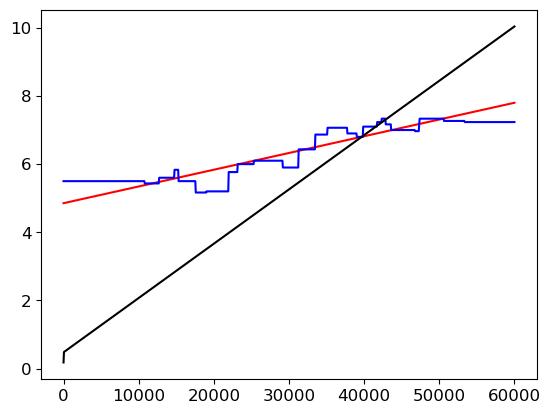

In [9]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X, y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 

plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

cyprus_life_satisfaction = mlp.predict(M)
print(f"Predicted Life Satisfaction for Cyprus: {cyprus_life_satisfaction[0]}")

mlp_score = mlp.score(X, y)
print(f"MLPRegressor Score: {mlp_score}")